## Mathematical Principles in Pattern Recognition (2017/2018)
$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

# Lab 1

In the computer labs we will work with the Python programming language within a Jupyter notebook. Each week a new notebook is made available that contains the exercises that are to be handed-in. 

* You are expected to work in pairs.
* Only one of each pair has to submit on blackboard. Make sure that you add the student ID of your partner in the submission comments.
* The main notebook file you submit should read "Lab[number]_[last name 1]_[last name 2].ipynb", for example "Lab2_Bongers_Versteeg.ipynb". 
* Please make sure your code will run without problems!

Feel free ask any questions during the computer lab sessions, or email the TA, Elise (e.e.vanderpol@uva.nl).

**The due date for the labs is Friday, Sep 15 at 15:00**

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Central Limit Theory

In this exercise we play with discrete variables, drawn from a Bernoulli and Binomial distributions. In the end we will explore an example Central Limit Theorem (CLT) with respect to a Binomial random variable. THe CLT states that the sum or average of many independent copies of a random variable is approximately a normal random variable. An example plot of the probability desnity of a standard normal distribution is given below.

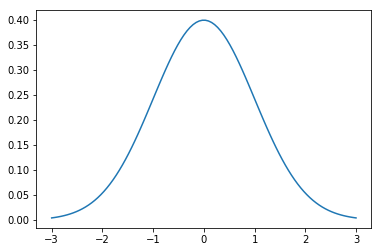

In [110]:
def gaussian_pdf(x, mu, sigma):
    return np.exp(-(x-mu)**2 /(2*sigma**2))/math.sqrt(2*math.pi * sigma**2)

x = np.linspace(-3,3,100)
plt.plot(x, gaussian_pdf(x, mu=0, sigma=1))
plt.show()

### 1.1 Bernoulli trial
**[20 points]** Write a function `bernoulli_trial(p)` that returns a $1$ with probability $p$ and $0$ with probability $1 - p$. Use a random sampling method from the `random` or `numpy.random` modules in your implementation. Print the results of 10 repeated independent trials by calling the function 10 times for $p = 0.5$.

In [111]:
def bernoulli_trial(p):
    return int(p > random.random())
    
for _ in range(10):
    print(bernoulli_trial(0.5))

0
1
1
0
0
0
1
1
1
1


### 1.2 Multiple trials
**[20 points]** Write a method `multiple_trials(n, p)` that returns a $N$-dimensional vector $\bx$ where each $x_i$ is a Bernoulli sample. Use your implementation of the Bernoulli trial and make sure it returns a vector, i.e. a numpy array. Again print the output of 10 trials with $p = 0.5$ 

In [112]:
def multiple_trials(n, p):
    return np.array([bernoulli_trial(p) for _ in range(n)])

print(multiple_trials(10, .5))

[0 0 1 1 0 1 0 1 1 0]


### 1.3 Binomial
**[20 points]** Write a simple function that, for a given numpy array consisting of zero's and ones, return the number of positives. Use this in a function named `binomial_sample(n,m,p)` that returns a vector of size $n$, where each slot contains the number of positives in $m$ trials, where each positive has probability $p$.

In [113]:
# Using a default function to count nonzero's
def totalPositives(array):
    return count_nonzero(array)

# n = vector length
# m = nr of experiments
# p = probability
def binomial_sample(n, m, p):
    return np.asarray([totalPositives(multiple_trials(m, p)) for _ in range(n)])

print(binomial_sample(500, 10, .25))

[3 2 4 2 3 0 4 0 3 3 2 3 3 0 3 3 1 2 0 3 6 3 3 1 4 2 2 3 3 2 2 5 1 1 2 3 3
 0 2 2 5 3 2 5 2 3 2 4 2 3 2 2 1 3 2 2 3 6 0 1 2 2 2 1 3 4 1 2 1 4 3 4 0 3
 6 5 5 1 4 5 3 2 2 1 3 4 3 3 3 4 2 3 1 2 4 2 2 4 4 2 3 2 3 2 3 3 3 1 4 2 3
 1 2 1 2 1 2 3 2 0 2 1 3 2 2 0 1 1 2 3 2 2 1 2 2 0 4 3 3 5 4 1 1 2 2 2 4 3
 2 1 1 0 4 0 2 3 2 2 5 0 3 1 2 3 3 4 2 3 1 3 4 2 0 2 2 2 4 3 1 3 1 2 1 3 2
 3 4 1 2 4 3 1 3 2 5 2 1 1 3 3 3 3 1 3 2 3 0 3 0 4 0 1 0 1 3 2 5 0 1 2 3 5
 4 2 1 3 2 2 3 1 2 3 3 3 4 0 4 1 2 3 5 3 5 2 4 4 2 3 4 3 1 5 2 3 2 4 3 4 2
 3 2 4 1 3 2 3 2 1 3 1 2 3 2 2 4 3 3 5 2 1 4 4 4 2 2 4 4 3 2 1 6 4 4 1 1 1
 3 2 1 0 1 3 4 3 1 1 1 3 4 1 5 1 0 2 1 2 4 2 1 1 2 1 2 2 5 2 2 6 2 2 2 1 1
 2 5 3 6 4 3 3 3 3 4 3 1 1 1 1 1 2 2 3 3 3 3 2 4 3 1 3 3 1 1 5 2 2 5 2 3 3
 1 2 3 3 3 2 3 2 1 2 3 3 6 5 2 1 3 2 4 2 3 2 1 1 1 2 3 3 3 2 3 4 1 3 2 3 3
 0 1 2 2 3 2 3 2 2 3 2 5 0 3 2 4 4 1 1 1 2 4 5 1 2 2 0 4 5 2 1 2 2 5 3 3 4
 1 1 3 2 1 2 3 2 3 2 1 3 3 1 4 5 3 1 2 3 2 4 4 1 4 0 2 3 1 1 2 5 3 2 4 3 1
 0 3 1 2 3 4 0 4 3 2 4 2 

### 1.4 Histogram
**[20 points]** Recreate a sampling distribution similar to Figure 2.1 in Bishop by drawing $500$ Binomial samples, i.e. from `binomial_sample(n,m,p)`, with $m=10$ and $p=0.25$. Make sure you normalize the histogram to get a sampling density distribution. Hint: you can use `plt.hist()` to plot historgams.

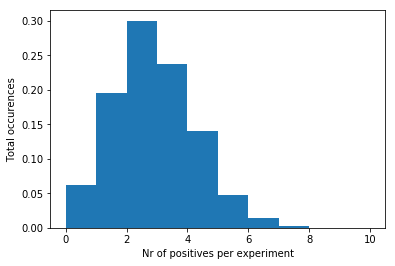

In [114]:

# Creating a sample
x = binomial_sample(500, 10, 0.25)

# Normalizing such that area under curve = 1
weights = np.ones_like(x)/float(len(x))

# Creating histogram
_ = plt.hist(x, weights=weights, bins=np.arange(11))
_ = plt.xlabel('Nr of positives per experiment')
_ = plt.ylabel('Total occurences')

# Drawing
plt.show()


### 1.5 Central limit theorem
**[20 points]** Plot another histogram but now with $10^5$ samples, $p=0.4$ and $m=10$. In the same plot, draw a normal distribution with $\mu = 4$ and $\sigma=\sqrt{2.4}$. Do these results make sense?

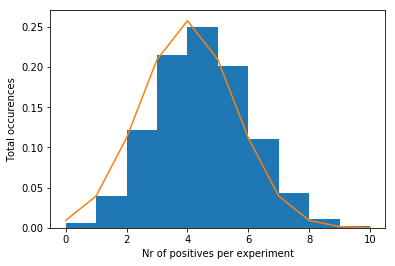

In [115]:

# Creating a sample
x = binomial_sample(10**5, 10, 0.4)
x.sort()

# Normalizing such that area under curve = 1
weights = np.ones_like(x)/float(len(x))

# Creating histogram
_ = plt.hist(x, weights=weights, bins=np.arange(11))
_ = plt.xlabel('Nr of positives per experiment')
_ = plt.ylabel('Total occurences')
plt.plot(x, gaussian_pdf(x, mu=4, sigma=sqrt(2.4)))

# Drawing
plt.show()


[___answer here___]

In [ ]:
They very much do, although the bars are a littlebit shifted to the right, making the normal distribution seem off.